In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',21)

In [2]:
MOBILE_PATH = "datasets/"
def load_data(books_path=MOBILE_PATH):    
    csv_path = os.path.join(books_path, "mobile_train.csv")   
    return pd.read_csv(csv_path, error_bad_lines=False)


# Описание данных

In [3]:
mobile_data = load_data()
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(f'Total shape {mobile_data.shape}')
print(f'All columns: {", ".join(mobile_data.columns.values)}')

Total shape (2000, 21)
All columns: battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range


In [5]:
mobile_data.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


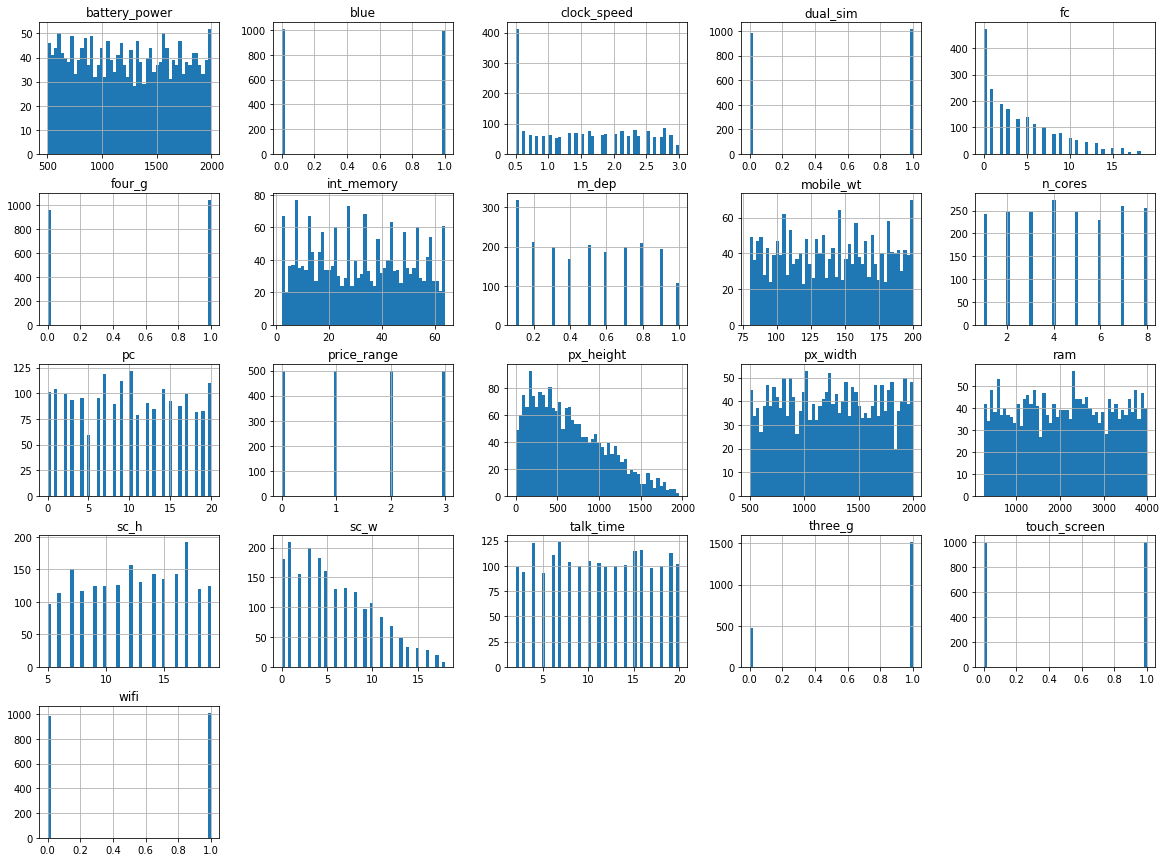

In [6]:
mobile_data.hist(bins = 50,figsize=(20,15))
plt.savefig('./mobile_hist.png')
plt.show()

In [7]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [8]:
target = 'price_range'

# Работа с выбросами

In [9]:
X = mobile_data.drop(labels=target, axis=1)
db = DBSCAN(eps = 400, min_samples = 3)
X = mobile_data.drop(labels=[target] ,axis=1)

db.fit(X)
mobile_data = mobile_data.drop(np.where(db.labels_==-1)[0])

idx = (db.labels_== -1)
db.labels_[idx].shape

(5,)

# Корреляция признаков

In [10]:
corr_matrix = mobile_data.corr()
corr_matrix[target].sort_values(ascending=False)

price_range      1.000000
ram              0.917290
battery_power    0.199229
px_width         0.167032
px_height        0.151078
int_memory       0.045241
sc_w             0.039358
pc               0.032499
three_g          0.024867
talk_time        0.022984
sc_h             0.022857
blue             0.021303
fc               0.021211
dual_sim         0.019954
wifi             0.017711
four_g           0.015924
n_cores          0.006718
m_dep           -0.000934
clock_speed     -0.007347
touch_screen    -0.031167
mobile_wt       -0.031515
Name: price_range, dtype: float64

# Результирующие описание

In [11]:
mobile_data.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,1238.771930,0.495238,1.522406,0.509774,4.311278,0.521303,32.042105,0.502005,140.210025,4.518797,9.925313,642.029073,1249.733835,2125.666165,12.302757,5.762406,11.011028,0.761905,0.502757,0.506266,1.500251
std,439.310048,0.500103,0.815702,0.500030,4.342282,0.499671,18.142980,0.288471,35.390918,2.286198,6.066328,440.045536,431.269283,1084.985540,4.216028,4.354719,5.464197,0.426024,0.500118,0.500086,1.118090
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.000000,874.000000,1208.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1229.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,563.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,944.500000,1630.000000,3067.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.500000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Визуализация

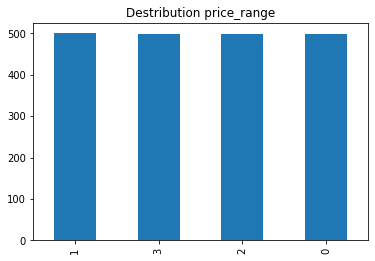

In [12]:
# Четыре кластера 0 1 2 3
fig, ax = plt.subplots(1,1)
predict_column = 'price_range'
ax.set_title(f'Destribution {predict_column}')
mobile_data['price_range'].value_counts().plot.bar(ax = ax)
fig.savefig('./mobile_kde.png')
plt.show()

In [13]:
from sklearn.manifold import TSNE
mobile_data_tsne = TSNE().fit_transform(mobile_data.drop(labels = predict_column,axis = 1))

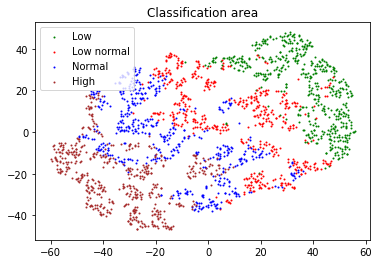

In [14]:
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==0, 0], mobile_data_tsne[mobile_data[predict_column]==0, 1], c='green', label='Low',s=1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==1, 0], mobile_data_tsne[mobile_data[predict_column]==1, 1], c = 'red', label = 'Low normal',s = 1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==2, 0], mobile_data_tsne[mobile_data[predict_column]==2, 1], c = 'blue', label = 'Normal',s = 1)
plt.scatter(mobile_data_tsne[mobile_data[predict_column]==3, 0], mobile_data_tsne[mobile_data[predict_column]==3, 1], c = 'brown', label = 'High',s = 1)
plt.title('Classification area')
plt.legend()
plt.savefig('./mobile_tsne.png')
plt.show()